In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [2]:
data=pd.read_csv(r"D:\Sameer\Sameer IMARTICUS\Machine Learning\BlackFriday\Sales_BF\train\train.csv")

In [3]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
data.describe(percentiles=[0.01, 0.02, 0.05, 0.1, 0.25, 0.5, 0.75,0.85, 0.90,0.92, 0.95, 0.97, 0.98, 0.99]).T

,count,mean,std,min,1%,2%,5%,10%,25%,50%,75%,85%,90%,92%,95%,97%,98%,99%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1000068.0,1000149.0,1000329.0,1000670.0,1001516.0,1003077.0,1004478.0,1005107.0,1005446.0,1005557.00,1005747.0,1005852.0,1005916.00,1005980.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,0.0,0.0,0.0,0.0,2.0,7.0,14.0,17.0,17.0,18.00,20.0,20.0,20.00,20.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0,1.0,1.00,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,1.0,1.0,1.0,1.0,5.0,8.0,8.0,11.0,11.00,13.0,16.0,16.00,18.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,2.0,2.0,2.0,2.0,5.0,9.0,15.0,16.0,16.0,16.00,16.0,17.0,17.00,17.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,4.0,5.0,5.0,5.0,9.0,14.0,16.0,16.0,17.0,17.00,17.0,17.0,18.00,18.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,587.0,954.0,1984.0,3540.0,5823.0,8047.0,12054.0,15608.0,16317.0,18290.56,19336.0,19628.0,20202.66,20665.0,23961.0


In [6]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

# univariate 

<AxesSubplot:>

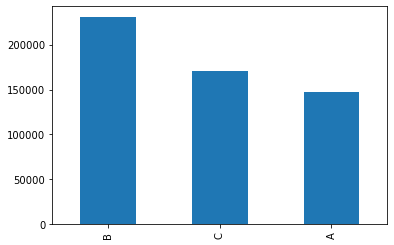

In [8]:
data['City_Category'].value_counts().plot(kind='bar')

<AxesSubplot:>

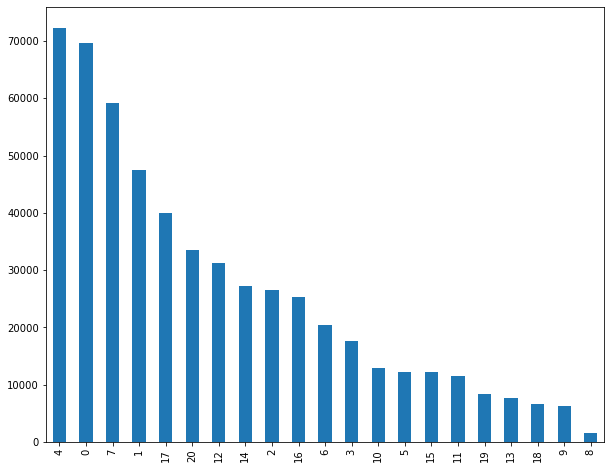

In [9]:
plt.figure(figsize=[10,8])
data['Occupation'].value_counts().plot(kind='bar')

<AxesSubplot:>

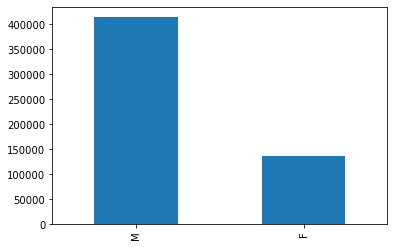

In [10]:
data['Gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

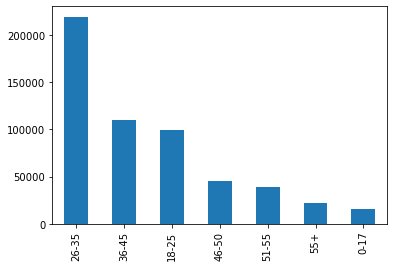

In [11]:
data['Age'].value_counts().plot(kind='bar')

<AxesSubplot:>

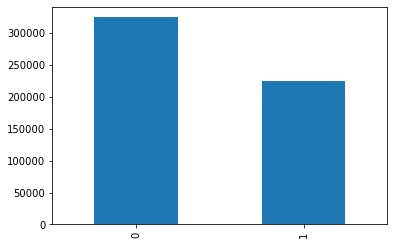

In [12]:
data['Marital_Status'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Product_Category_1'>

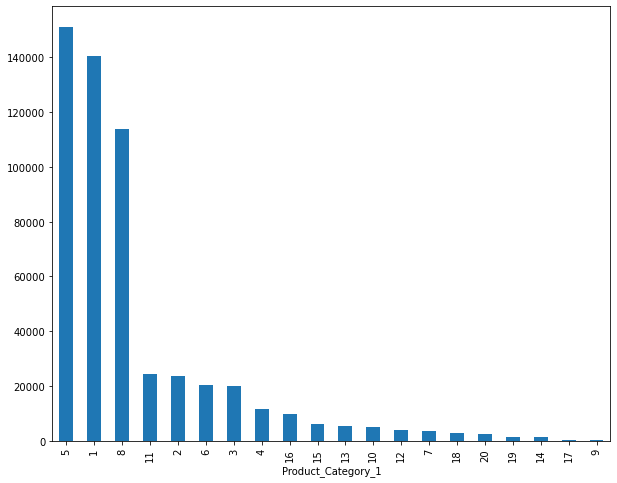

In [13]:
plt.figure(figsize=[10,8])
data.value_counts('Product_Category_1').plot(kind='bar')

<AxesSubplot:xlabel='Product_Category_2'>

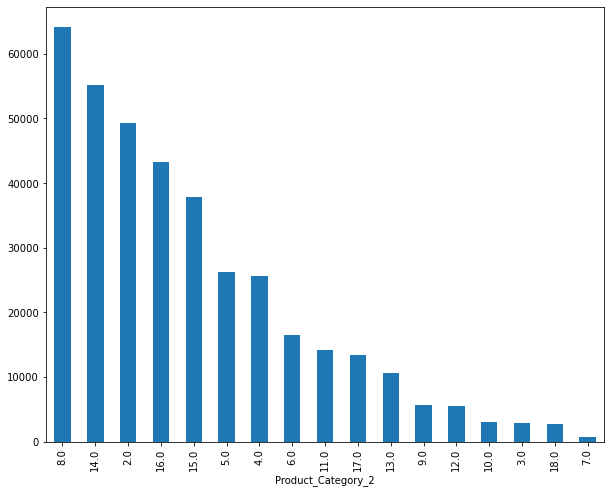

In [14]:
plt.figure(figsize=[10,8])
data.value_counts('Product_Category_2').plot(kind='bar')

<AxesSubplot:xlabel='Product_Category_3'>

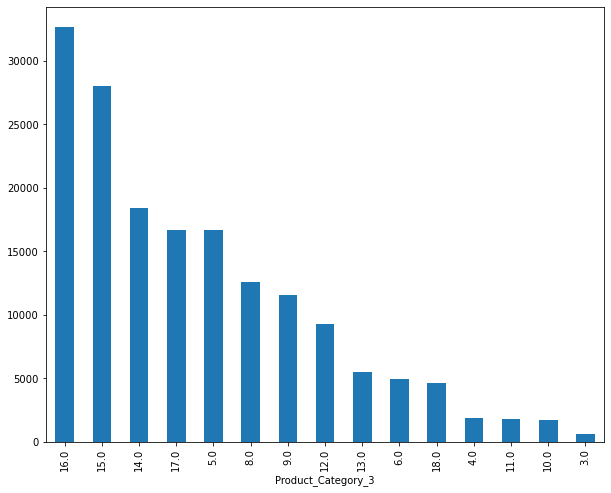

In [15]:
plt.figure(figsize=[10,8])
data.value_counts('Product_Category_3').plot(kind='bar')

In [16]:
data['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1005391       7
1002690       7
1002111       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [17]:
data['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00203242       1
P00070142       1
P00056342       1
P00062342       1
P00307242       1
Name: Product_ID, Length: 3631, dtype: int64

In [18]:
data['Product_ID'].nunique()

3631

In [19]:
data['User_ID'].nunique()

5891

<AxesSubplot:>

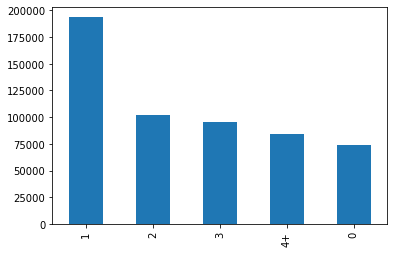

In [20]:
data['Stay_In_Current_City_Years'].value_counts().plot(kind='bar')

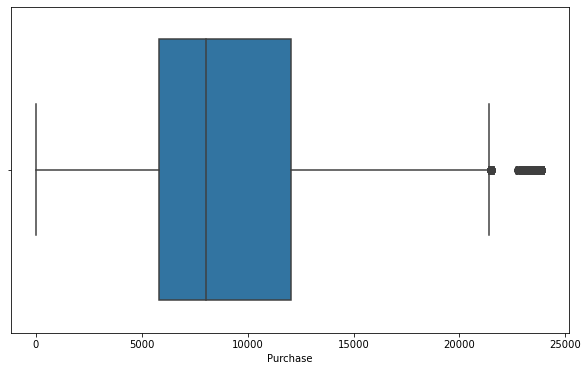

In [21]:
plt.figure(figsize=[10,6])
sns.boxplot(data=data,x='Purchase')

plt.show()

# Bivariate analysis


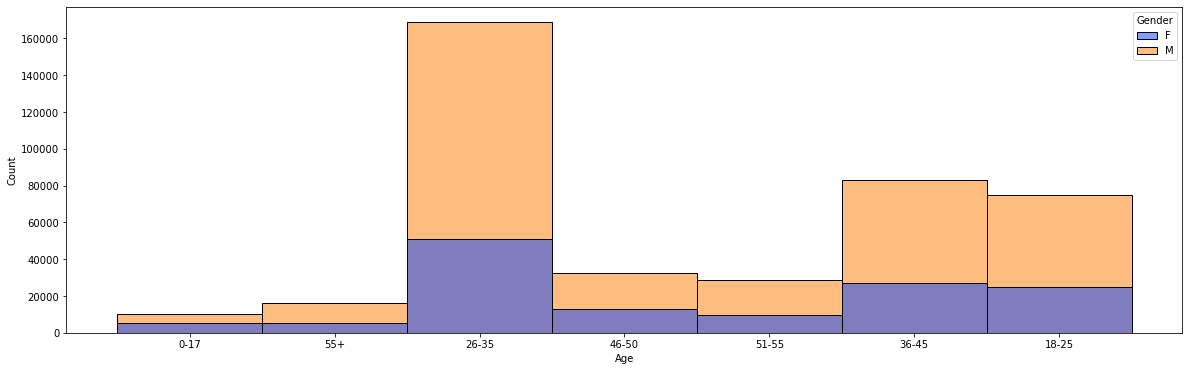

In [22]:
plt.figure(figsize=[20,6])
sns.histplot(data,x='Age',hue='Gender',bins=10,palette='bright')
plt.show()

In [23]:
data_gp=pd.DataFrame(data.groupby(["Gender", "Age"]).size())
data_gp=data_gp.rename(columns={0:'count'})
data_gp

count
Gender Age          
F      0-17     5083
       18-25   24628
       26-35   50752
       36-45   27170
       46-50   13199
       51-55    9894
       55+      5083
M      0-17    10019
       18-25   75032
       26-35  168835
       36-45   82843
       46-50   32502
       51-55   28607
       55+     16421

<Figure size 1440x432 with 0 Axes>

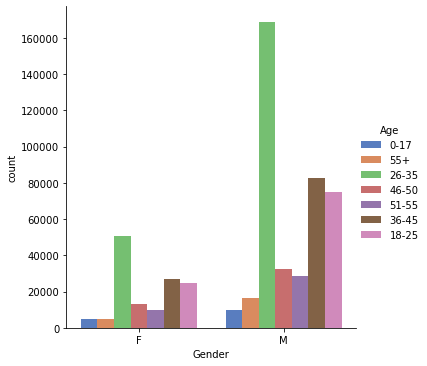

In [24]:
plt.figure(figsize=[20,6])
sns.catplot(data=data,x='Gender',hue='Age',kind='count',palette='muted')

plt.show()

In [25]:
pd.DataFrame(data.groupby(['Gender','City_Category']).size(),columns=['count'])

count
Gender City_Category        
F      A               35704
       B               57796
       C               42309
M      A              112016
       B              173377
       C              128866

<Figure size 720x432 with 0 Axes>

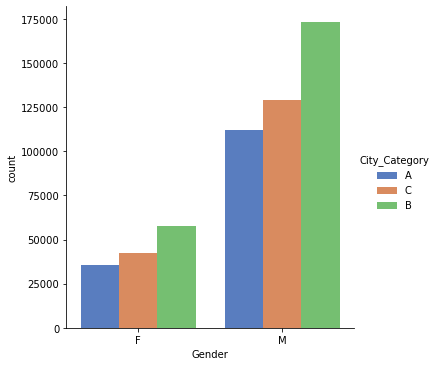

In [26]:
plt.figure(figsize=[10,6])
sns.catplot(data=data,x='Gender',hue='City_Category',kind='count',palette='muted')
plt.show()

In [27]:
pd.DataFrame(data.groupby(['Gender','Stay_In_Current_City_Years']).size(),columns=['count'])

count
Gender Stay_In_Current_City_Years        
F      0                            17063
       1                            51298
       2                            24332
       3                            24520
       4+                           18596
M      0                            57335
       1                           142523
       2                            77506
       3                            70765
       4+                           66130

<Figure size 720x432 with 0 Axes>

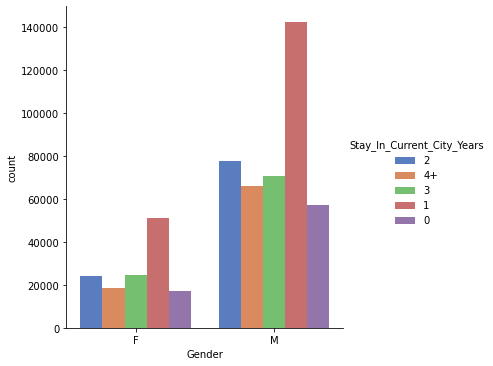

In [28]:
plt.figure(figsize=[10,6])
sns.catplot(data=data,x='Gender',hue='Stay_In_Current_City_Years',kind='count',palette='muted')
plt.show()

In [29]:
pd.DataFrame(data.groupby(['Gender','Marital_Status']).size(),columns=['count'])

count
Gender Marital_Status        
F      0                78821
       1                56988
M      0               245910
       1               168349

<Figure size 720x432 with 0 Axes>

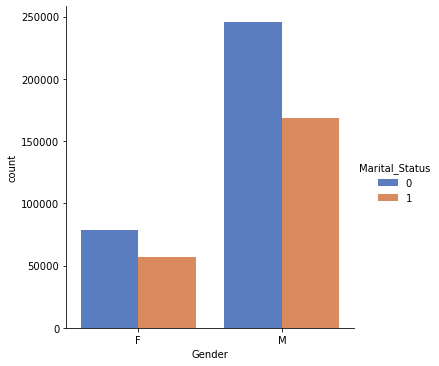

In [30]:
plt.figure(figsize=[10,6])
sns.catplot(data=data,x='Gender',hue='Marital_Status',kind='count',palette='muted')
plt.show()

<AxesSubplot:xlabel='Gender'>

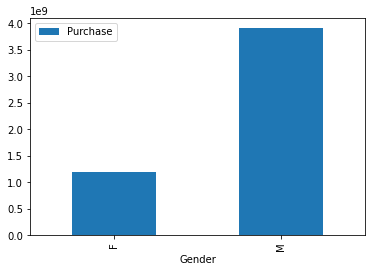

In [31]:
pd.DataFrame(data.groupby('Gender').Purchase.sum()).plot(kind='bar')

In [32]:
pd.DataFrame(data.groupby(['Age','Marital_Status']).size(),columns=['count'])

count
Age   Marital_Status        
0-17  0                15102
18-25 0                78544
      1                21116
26-35 0               133296
      1                86291
36-45 0                66377
      1                43636
46-50 0                12690
      1                33011
51-55 0                10839
      1                27662
55+   0                 7883
      1                13621

<Figure size 720x432 with 0 Axes>

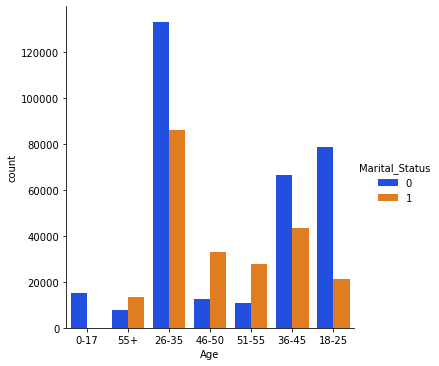

In [33]:
plt.figure(figsize=[10,6])
sns.catplot(data=data,x='Age',hue='Marital_Status',kind='count',palette='bright')
plt.show()

In [34]:
pd.DataFrame(data.groupby(['Age','City_Category']).size(),columns=['count'])

count
Age   City_Category       
0-17  A               2544
      B               5435
      C               7123
18-25 A              27535
      B              43247
      C              28878
26-35 A              73745
      B              91584
      C              54258
36-45 A              26617
      B              47598
      C              35798
46-50 A               7607
      B              20406
      C              17688
51-55 A               6099
      B              17741
      C              14661
55+   A               3573
      B               5162
      C              12769

In [35]:
pd.DataFrame(data.groupby(['Age','Stay_In_Current_City_Years']).size(),columns=['count'])

count
Age   Stay_In_Current_City_Years       
0-17  0                            2210
      1                            4925
      2                            3550
      3                            2765
      4+                           1652
18-25 0                           16582
      1                           32316
      2                           19251
      3                           15393
      4+                          16118
26-35 0                           27709
      1                           77469
      2                           39854
      3                           39478
      4+                          35077
36-45 0                           13914
      1                           37074
      2                           21056
      3                           22992
      4+                          14977
46-50 0                            6693
      1                           17912
      2                            7921
      3                            5996
      4+                           7179
51-55 0                            4380
      1                           16966
      2                            6104
      3                            5023
      4+                           6028
55+   0                            2910
      1                            7159
      2                            4102
      3                            3638
      4+                           3695

<AxesSubplot:xlabel='Age'>

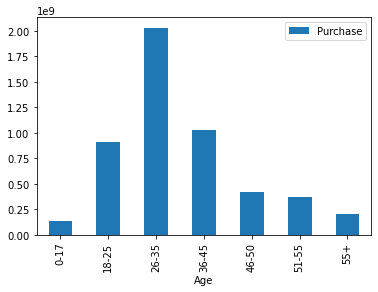

In [36]:
pd.DataFrame(data.groupby(['Age']).Purchase.sum()).plot(kind='bar')

<AxesSubplot:xlabel='City_Category'>

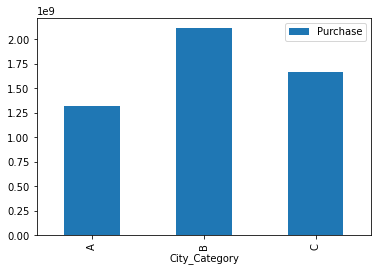

In [37]:
pd.DataFrame(data.groupby(['City_Category']).Purchase.sum()).plot(kind='bar')

In [38]:
pd.DataFrame(data.groupby(['City_Category','Marital_Status']).size(),columns=['count'])

count
City_Category Marital_Status        
A             0                91173
              1                56547
B             0               136721
              1                94452
C             0                96837
              1                74338

<AxesSubplot:xlabel='Marital_Status'>

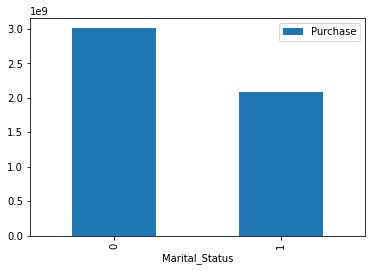

In [39]:
pd.DataFrame(data.groupby(['Marital_Status']).Purchase.sum()).plot(kind='bar')

In [40]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


<AxesSubplot:>

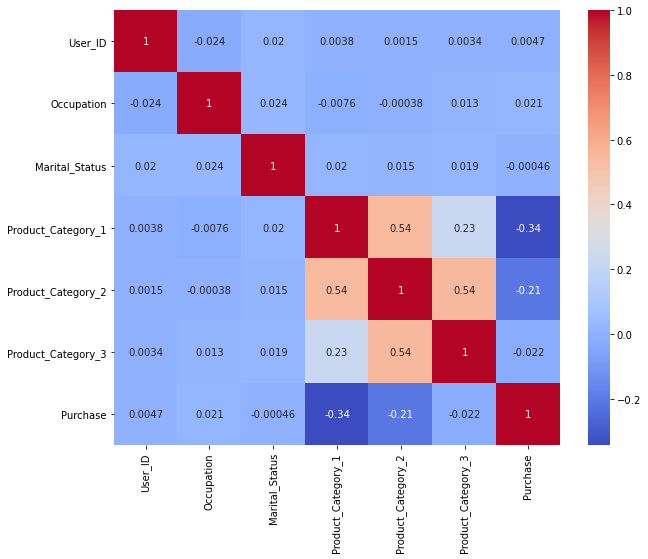

In [41]:
plt.figure(figsize=[10,8])
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

In [42]:
data_1=data.copy()

In [43]:
data2=data_1.drop(columns=['User_ID','Product_ID'])

In [44]:
data2

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,F,55+,1,C,2,0,20,NaN,NaN,365


In [45]:
datafill=data2.fillna(0)

In [46]:
datafill

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,M,55+,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,0.0,0.0,368
550064,F,26-35,1,C,3,0,20,0.0,0.0,371
550065,F,26-35,15,B,4+,1,20,0.0,0.0,137
550066,F,55+,1,C,2,0,20,0.0,0.0,365


In [47]:
dataDummy=pd.get_dummies(datafill,columns=['Gender', 'Age', 'City_Category','Stay_In_Current_City_Years'],drop_first=True)

In [48]:
dataDummy

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,0.0,0.0,8370,0,0,0,0,0,0,0,0,0,0,1,0,0
1,10,0,1,6.0,14.0,15200,0,0,0,0,0,0,0,0,0,0,1,0,0
2,10,0,12,0.0,0.0,1422,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10,0,12,14.0,0.0,1057,0,0,0,0,0,0,0,0,0,0,1,0,0
4,16,0,8,0.0,0.0,7969,1,0,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,13,1,20,0.0,0.0,368,1,0,0,0,0,1,0,1,0,1,0,0,0
550064,1,0,20,0.0,0.0,371,0,0,1,0,0,0,0,0,1,0,0,1,0
550065,15,1,20,0.0,0.0,137,0,0,1,0,0,0,0,1,0,0,0,0,1
550066,1,0,20,0.0,0.0,365,0,0,0,0,0,0,1,0,1,0,1,0,0


In [49]:
X=dataDummy.drop(["Purchase"], axis=1)
y=dataDummy["Purchase"]

In [50]:
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

# XG boost

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=80)

In [53]:
import xgboost as xg

In [54]:
from xgboost import XGBRegressor

In [56]:
xgb1=XGBRegressor(n_estimators=350,learning_rate=0.05,verbosity=1,max_depth=9,n_jobs=-1,random_state=95)
xgb1.fit(X_train, y_train)
print("Train Score :", xgb1.score(X_train, y_train))
print("Test Score :", xgb1.score(X_test, y_test))

Train Score : 0.7059005276097776
Test Score : 0.6807543094342221


In [57]:
y_pred =xgb1.predict(X_test)

In [60]:
y_pred

array([14513.461 ,  7758.767 ,  5966.6206, ...,  5860.692 , 12591.245 ,
        6971.9404], dtype=float32)

In [61]:
from sklearn import metrics

In [62]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 2114.462033940627


In [63]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 2841.7212422916614


In [64]:
from sklearn.metrics import r2_score
print('R Squared Score is:', r2_score(y_test, y_pred))

R Squared Score is: 0.6807543094342221


# Test

In [65]:
dataT=pd.read_csv(r"D:\Sameer\Sameer IMARTICUS\Machine Learning\BlackFriday\Sales_BF\test\test.csv")

In [66]:
dataT

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [67]:
dataTF=dataT.fillna(0)

In [68]:
dataTF

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,0.0
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,0.0
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,0.0
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,0.0
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,0.0,0.0
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,0.0
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,0.0


In [69]:
dataTF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          233599 non-null  float64
 10  Product_Category_3          233599 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [70]:
dataTF.describe(percentiles=[0.01, 0.02, 0.05, 0.1, 0.25, 0.5, 0.75,0.85, 0.90,0.92, 0.95, 0.97, 0.98, 0.99]).T

,count,mean,std,min,1%,2%,5%,10%,25%,50%,75%,85%,90%,92%,95%,97%,98%,99%,max
User_ID,233599.0,1.003029e+06,1726.504968,1000001.0,1000069.0,1000148.0,1000327.0,1000671.0,1001527.0,1003070.0,1004477.0,1005107.0,1005446.0,1005556.0,1005747.0,1005851.0,1005916.0,1005980.0,1006040.0
Occupation,233599.0,8.085407e+00,6.521146,0.0,0.0,0.0,0.0,0.0,2.0,7.0,14.0,17.0,17.0,18.0,20.0,20.0,20.0,20.0,20.0
Marital_Status,233599.0,4.100702e-01,0.491847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Product_Category_1,233599.0,5.276542e+00,3.736380,1.0,1.0,1.0,1.0,1.0,1.0,5.0,8.0,8.0,10.0,11.0,12.0,15.0,16.0,16.0,18.0
Product_Category_2,233599.0,6.799237e+00,6.217668,0.0,0.0,0.0,0.0,0.0,0.0,5.0,14.0,15.0,16.0,16.0,16.0,17.0,17.0,17.0,18.0
Product_Category_3,233599.0,3.852756e+00,6.256634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,14.0,15.0,16.0,16.0,17.0,17.0,17.0,18.0


<AxesSubplot:>

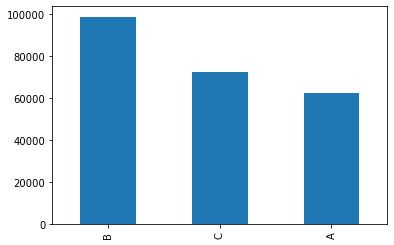

In [71]:
dataTF['City_Category'].value_counts().plot(kind='bar')

<AxesSubplot:>

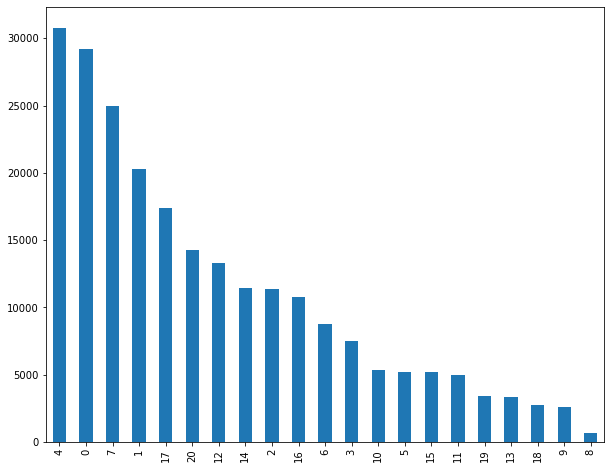

In [72]:
plt.figure(figsize=[10,8])
dataTF['Occupation'].value_counts().plot(kind='bar')

<AxesSubplot:>

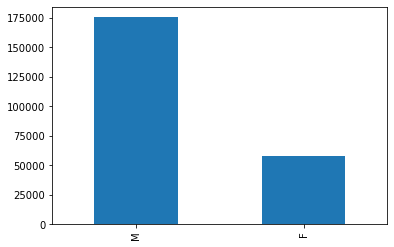

In [73]:
dataTF['Gender'].value_counts().plot(kind='bar')


<AxesSubplot:>

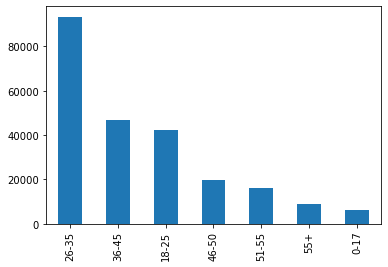

In [74]:
dataTF['Age'].value_counts().plot(kind='bar')

<AxesSubplot:>

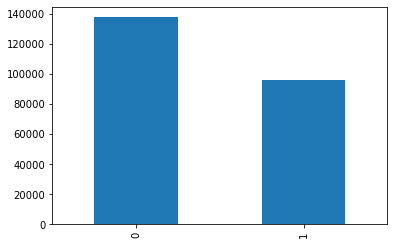

In [75]:
dataTF['Marital_Status'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Product_Category_1'>

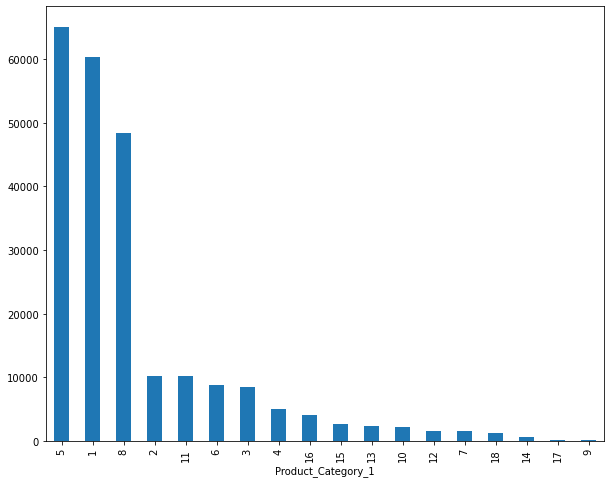

In [76]:
plt.figure(figsize=[10,8])
dataTF.value_counts('Product_Category_1').plot(kind='bar')

<AxesSubplot:xlabel='Product_Category_2'>

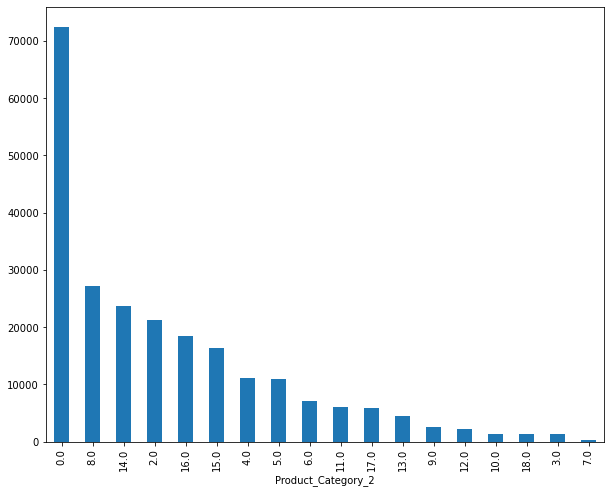

In [77]:
plt.figure(figsize=[10,8])
dataTF.value_counts('Product_Category_2').plot(kind='bar')

<AxesSubplot:xlabel='Product_Category_3'>

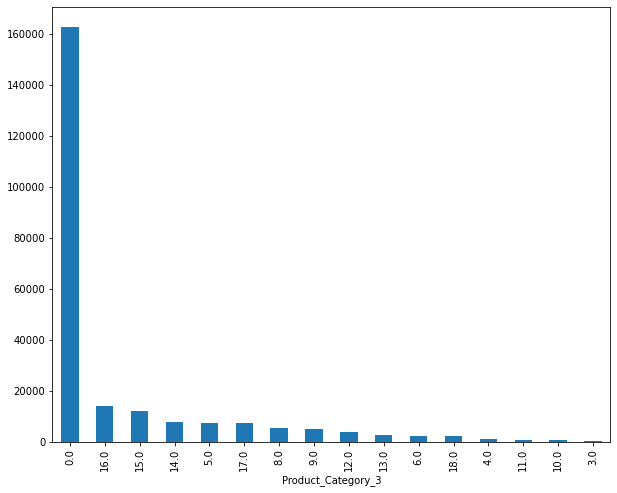

In [78]:
plt.figure(figsize=[10,8])
dataTF.value_counts('Product_Category_3').plot(kind='bar')

In [79]:
dataTF['User_ID'].value_counts()

1001680    442
1004277    405
1001941    388
1000889    381
1001181    368
          ... 
1005207      1
1004419      1
1001656      1
1000665      1
1005796      1
Name: User_ID, Length: 5891, dtype: int64

In [80]:
dataTF['Product_ID'].value_counts()

P00265242    829
P00112142    717
P00025442    695
P00110742    680
P00046742    646
            ... 
P00261042      1
P00312542      1
P00149042      1
P00239542      1
P0097642       1
Name: Product_ID, Length: 3491, dtype: int64

In [81]:
dataTF['Product_ID'].nunique()

3491

In [82]:
dataTF['User_ID'].nunique()

5891

<AxesSubplot:>

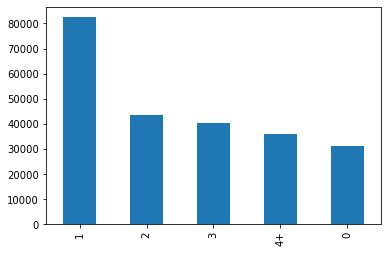

In [83]:
dataTF['Stay_In_Current_City_Years'].value_counts().plot(kind='bar')

In [84]:
dataTF1=dataTF.copy()

In [85]:
dataTF2=dataTF.drop(columns=['User_ID','Product_ID'])
dataTF_IMP=dataTF[['User_ID','Product_ID']]

In [86]:
dataTF_IMP

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842
...,...,...
233594,1006036,P00118942
233595,1006036,P00254642
233596,1006036,P00031842
233597,1006037,P00124742


In [87]:
dataTF2

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,M,46-50,7,B,2,1,1,11.0,0.0
1,M,26-35,17,C,0,0,3,5.0,0.0
2,F,36-45,1,B,4+,1,5,14.0,0.0
3,F,36-45,1,B,4+,1,4,9.0,0.0
4,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...
233594,F,26-35,15,B,4+,1,8,0.0,0.0
233595,F,26-35,15,B,4+,1,5,8.0,0.0
233596,F,26-35,15,B,4+,1,1,5.0,12.0
233597,F,46-50,1,C,4+,0,10,16.0,0.0


In [88]:
dataDummy2=pd.get_dummies(dataTF2,columns=['Gender', 'Age', 'City_Category','Stay_In_Current_City_Years'],drop_first=True)

In [89]:
dataDummy2

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,7,1,1,11.0,0.0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,17,0,3,5.0,0.0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,1,1,5,14.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,1,1,4,9.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,1,0,4,5.0,12.0,0,0,1,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,15,1,8,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,1
233595,15,1,5,8.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,1
233596,15,1,1,5.0,12.0,0,0,1,0,0,0,0,1,0,0,0,0,1
233597,1,0,10,16.0,0.0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [92]:
dataTEST=xgb1.predict(dataDummy2)

In [93]:
dataTEST

array([15812.198 , 10693.523 ,  6712.6953, ..., 12845.713 , 19782.242 ,
        2583.3276], dtype=float32)

In [94]:
DataFinalPurchase=pd.DataFrame(dataTEST)

In [95]:
DataFinalPurchase.columns=['Purchase']

In [96]:
DataFinalPurchase

,Purchase
0,15812.198242
1,10693.523438
2,6712.695312
3,3006.797119
4,2673.626221
...,...
233594,7132.359863
233595,6086.654785
233596,12845.712891
233597,19782.242188


In [97]:
DataFinal = pd.concat([dataTF_IMP,DataFinalPurchase], axis=1)

In [98]:
DataFinal

,User_ID,Product_ID,Purchase
0,1000004,P00128942,15812.198242
1,1000009,P00113442,10693.523438
2,1000010,P00288442,6712.695312
3,1000010,P00145342,3006.797119
4,1000011,P00053842,2673.626221
...,...,...,...
233594,1006036,P00118942,7132.359863
233595,1006036,P00254642,6086.654785
233596,1006036,P00031842,12845.712891
233597,1006037,P00124742,19782.242188


In [100]:
import os

In [101]:
os.getcwd()

'C:\\Users\\SAMEER GOGNA PC\\maching learning\\BlackFriday'

In [102]:
DataFinal.to_csv('Data_Final_.csv')